<a href="https://colab.research.google.com/github/sugi-san/PyMAF/blob/master/pymaf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

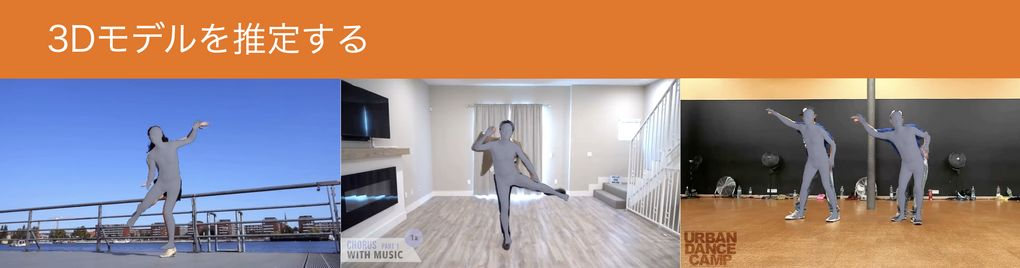

In [ ]:
#@title 1.セットアップ
# githubからコードを取得
! git clone https://github.com/sugi-san/PyMAF.git
%cd PyMAF

# 必要なファイルをダウンロード
! wget --no-check-certificate "https://onedrive.live.com/download?cid=DF2414B28D1B6A99&resid=DF2414B28D1B6A99%21862&authkey=AJqiZVYmJa6jgoU" -O pymaf_data_for_demo.zip
! unzip pymaf_data_for_demo.zip

# pytorchバージョン変更
! pip install -U https://download.pytorch.org/whl/cu100/torch-1.1.0-cp37-cp37m-linux_x86_64.whl
! pip install -U https://download.pytorch.org/whl/cu100/torchvision-0.3.0-cp37-cp37m-linux_x86_64.whl

# ライブラリーインストール
! pip install -r requirements.txt
! pip install imageio==2.4.1

# 関数読み込み
from function import *


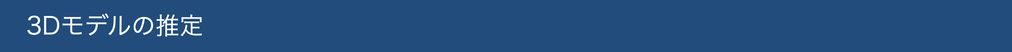

In [ ]:
#@title 2.動画の表示
reset_folder('pic')
files = sorted(os.listdir('video'))
for file in files:
  save_frame(file)
display_pic('pic', files)


In [ ]:
#@title 3.モデルの推定
video = 'sample3.mp4' #@param {type:"string"}
video_path = 'video/'+video

# モデル推定
! python3 demo.py --checkpoint=data/pretrained_model/PyMAF_model_checkpoint.pt\
                  --vid_file $video_path

# 推定動画の作成
print('making video...')
fps = get_fps(video_path)
dir_name = 'output/'+os.path.splitext(video)[0]+'/'+os.path.splitext(video)[0]+'_mp4_output'
file_name = dir_name+'/%6d.png'
! ffmpeg -y -r $fps -i $file_name -vcodec libx264 -pix_fmt yuv420p -loglevel error out.mp4

# 音声の抽出＆付加
print('preparation for sound...')
! ffmpeg -y -i $video_path -loglevel error sound.mp3
! ffmpeg -y -i out.mp4 -i sound.mp3 -loglevel error output.mp4

In [ ]:
#@title 4.動画の再生
display_mp4('output.mp4')

In [ ]:
#@title 5.動画のダウンロード
import os
import shutil
from google.colab import files

name = os.path.splitext(video)
file_name = name[0]+'_3d.mp4'
shutil.copy('output.mp4', 'download/'+file_name)
files.download('download/'+file_name)

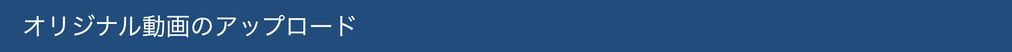

In [ ]:
#@title 6.動画のアップロード
#@markdown ・HD(1280×720)以下、30秒以内、音声付き動画にして下さい

import os
import shutil
from google.colab import files
import cv2

# ルートへ画像をアップロード
uploaded = files.upload()           
uploaded = list(uploaded.keys())    

# ルートから指定フォルダーへ移動
for file in uploaded:
    shutil.move(file, 'video/'+file)

###【備考】
・ブラウザは、必ずGoogle Chromeを使用して下さい。

・動作がおかしくなった場合の対応\
１）グーグルクロームの該当タブを削除して接続を切る\
２）再度リンクを開く\
３）右上にある「ランタイム／ランタイムを出荷時設定にリセット」をクリックする（下記写真を参照に下さい）\
４）あとは、動画にある通りの操作をすればOK

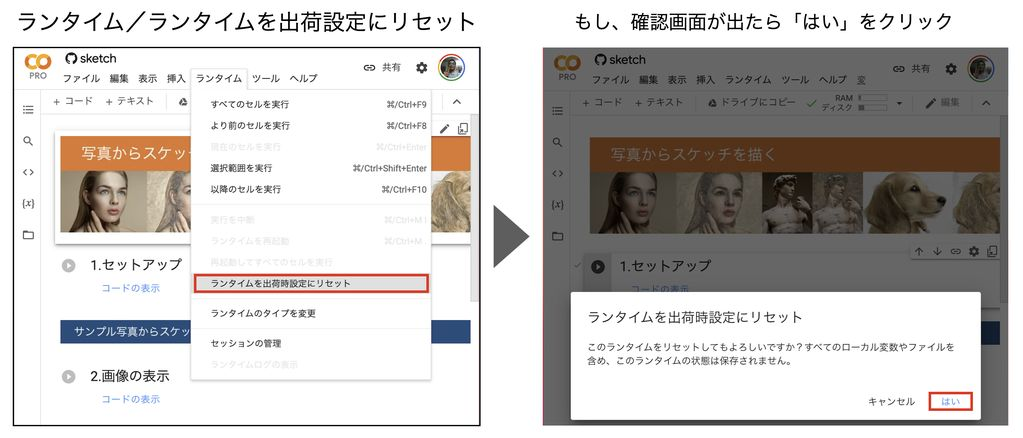